In [2]:
from sklearn.datasets import make_classification


In [3]:
x,y=make_classification(n_samples=1000, n_redundant=0, n_features=2, n_clusters_per_class=1, weights=[0.90], random_state=12)


In [5]:
import pandas as pd
df1=pd.DataFrame(x, columns=["feature1", "feature2"])
df2=pd.DataFrame(y, columns=["target"])
df=pd.concat([df1, df2], axis=1)
df.head()


,feature1,feature2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


In [6]:
df.value_counts("target")

target
0    900
1    100
Name: count, dtype: int64

In [7]:
df

,feature1,feature2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0
...,...,...,...
995,-0.712495,-0.880452,0
996,-2.625830,-2.827891,0
997,-1.326439,-1.815178,0
998,-0.833486,-0.514647,0


Text(0, 0.5, 'feature2')

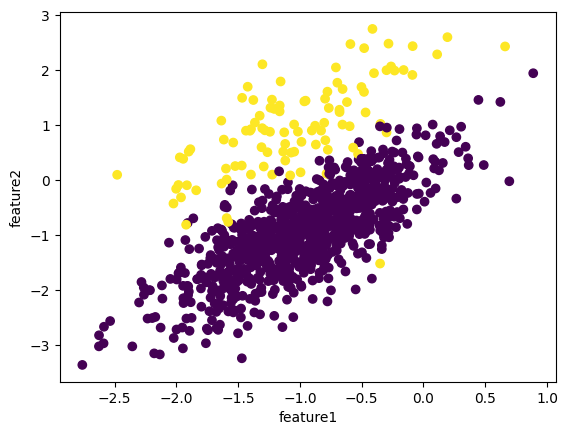

In [16]:
import matplotlib.pyplot as plt
plt.scatter(df.feature1, df.feature2, c=df.target)  
plt.xlabel("feature1")
plt.ylabel("feature2")


In [17]:
!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:

from imblearn.over_sampling import SMOTE   ### SMOTE stands for Synthetic Minority Over-sampling Technique
smote=SMOTE(random_state=12)
X,Y=smote.fit_resample(df[["feature1", "feature2"]], df.target)    


In [19]:
X.shape

(1800, 2)

In [28]:
Y

0       0
1       0
2       0
3       1
4       0
       ..
1795    1
1796    1
1797    1
1798    1
1799    1
Name: target, Length: 1800, dtype: int64

In [26]:

df1=pd.DataFrame(X, columns=["feature1", "feature2"])
df2=pd.DataFrame(Y, columns=["target"])
df=pd.concat([df1, df2], axis=1)
df


,feature1,feature2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0
...,...,...,...
1795,-1.468601,0.847261,1
1796,-1.920408,-0.124035,1
1797,-1.787328,0.624117,1
1798,0.065684,2.238479,1


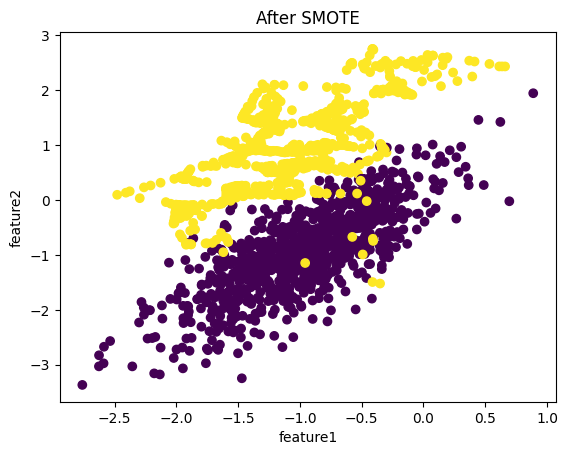

In [27]:
plt.scatter(df.feature1, df.feature2, c=df.target)
plt.xlabel("feature1")
plt.ylabel("feature2")
plt.title("After SMOTE")
plt.show()